In [ ]:
!python --version

Python 3.7.13


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import classification_report
import scikitplot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

Reading The Data from The CSV File

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SimCam-FE.csv')
data.head()

,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Mean,Fwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,...,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Pkt Size Avg,Fwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Fwd Act Data Pkts,Class
0,6,6485462,39,39212,1448,1005.435897,672.542067,6046.138270,8.634697,117917.49090,...,1448,687.929825,727.494916,529248.8521,700.214286,1005.435897,39,39212,35,Flood
1,6,5550756,48,53200,1448,1108.333333,609.177378,9584.280051,14.772762,68527.85185,...,1448,640.963855,718.277232,515922.1816,648.780488,1108.333333,48,53200,45,Flood
2,6,5983393,38,33476,1448,880.947368,711.655206,5594.818859,10.529143,96506.33871,...,1448,523.062500,698.289517,487608.2500,531.365079,880.947368,38,33476,32,Flood
3,6,3408746,44,43280,1448,983.636364,628.674097,12696.751240,18.481870,54979.77419,...,1448,676.250000,693.491511,480930.4762,686.984127,983.636364,44,43280,43,Flood
4,6,8862221,62,69620,1448,1122.903226,606.890778,7855.818536,10.268306,98469.12222,...,1448,756.739130,725.967681,527029.0741,765.054945,1122.903226,62,69620,56,Flood


▶ **MODEL PRE-PROCESSING**

---

Identifying Missing Data

In [ ]:
data.info()
print("------------------------")
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13315 entries, 0 to 13314
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Protocol           13315 non-null  int64  
 1   Flow Duration      13315 non-null  int64  
 2   Tot Fwd Pkts       13315 non-null  int64  
 3   TotLen Fwd Pkts    13315 non-null  int64  
 4   Fwd Pkt Len Max    13315 non-null  int64  
 5   Fwd Pkt Len Mean   13315 non-null  float64
 6   Fwd Pkt Len Std    13315 non-null  float64
 7   Flow Byts/s        13315 non-null  float64
 8   Flow Pkts/s        13315 non-null  float64
 9   Flow IAT Mean      13315 non-null  float64
 10  Flow IAT Std       13315 non-null  float64
 11  Flow IAT Max       13315 non-null  float64
 12  Fwd IAT Std        13315 non-null  float64
 13  Fwd IAT Max        13315 non-null  float64
 14  Bwd IAT Tot        13315 non-null  float64
 15  Bwd IAT Mean       13315 non-null  float64
 16  Bwd IAT Std        133

Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
TotLen Fwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Fwd IAT Std          0
Fwd IAT Max          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Fwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
Pkt Size Avg         0
Fwd Seg Size Avg     0
Subflow Fwd Pkts     0
Subflow Fwd Byts     0
Fwd Act Data Pkts    0
Class                0
dtype: int64

Handling Categorical Data

In [ ]:
data['Class']= data['Class'].astype('category')
data['Class']= data['Class'].cat.codes

View Correlation of Features

In [ ]:
data = data.drop("TotLen Fwd Pkts", axis=1)
data = data.drop("Fwd Pkt Len Mean", axis=1)
data = data.drop("Fwd Pkt Len Std", axis=1)
data = data.drop("Flow IAT Std", axis=1)
data = data.drop("Fwd IAT Std", axis=1)
data = data.drop("Bwd IAT Std", axis=1)
data = data.drop("Pkt Len Mean", axis=1)
data = data.drop("Pkt Len Std", axis=1)
data = data.drop("Pkt Len Var", axis=1)
data = data.drop("Pkt Size Avg", axis=1)
data = data.drop("Fwd Seg Size Avg", axis=1)
data = data.drop("Bwd IAT Tot", axis=1)
data = data.drop("Tot Fwd Pkts", axis=1)
data = data.drop("Bwd IAT Max", axis=1)
data = data.drop("Flow Byts/s", axis=1)
data = data.drop("Flow Pkts/s", axis=1)
data = data.drop("Fwd Pkt Len Max", axis=1)
data = data.drop("Subflow Fwd Pkts", axis=1)
data = data.drop("Fwd Header Len", axis=1)
data = data.drop("Subflow Fwd Byts", axis=1)
data = data.drop("Flow Duration", axis=1)
data = data.drop("Fwd IAT Max", axis=1)
data = data.drop("Bwd IAT Mean", axis=1)
data = data.drop("Flow IAT Mean", axis=1)
data = data.drop("Protocol", axis=1)
data = data.drop("Flow IAT Max", axis=1)
data = data.drop("Fwd Act Data Pkts", axis=1)
data.corr().style.background_gradient(cmap="Blues")

,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Class
Fwd Pkts/s,1.000000,-0.085462,0.212565,0.166998
Bwd Pkts/s,-0.085462,1.000000,-0.317433,-0.309762
Pkt Len Max,0.212565,-0.317433,1.000000,0.877138
Class,0.166998,-0.309762,0.877138,1.000000


View Class Distribution

In [ ]:
data['Class'].value_counts()

1    10379
0     2784
2      152
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions')

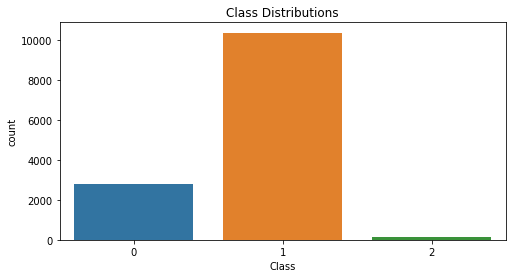

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot('Class', data=data)
plt.title('Class Distributions')

Split The Features from The Target Class

In [ ]:
y = data.Class
X = data.drop('Class', axis=1).values

Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy={0:3000, 2:3000}, random_state=0)
X, y= smote.fit_resample(X,y)

Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)

Perform SMOTEENN

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
#undersample = RandomUnderSampler(sampling_strategy='not minority')
#X, y = undersample.fit_resample(X, y)

In [ ]:
#from imblearn.combine import SMOTEENN

#smote_enn = SMOTEENN(random_state=0)
#X, y = smote_enn.fit_resample(X, y)

In [ ]:
#from imblearn.combine import SMOTETomek
#smote_tomek = SMOTETomek(random_state=0)
#X, y = smote_tomek.fit_resample(X, y)

View Class Distribution

In [ ]:
y.value_counts()

0    3000
1    3000
2    3000
Name: Class, dtype: int64

Split Dataset into 8:2 train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0, stratify = y)

Min-Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train= mms.fit_transform(X_train)
X_test= mms.transform(X_test)

**MODEL TRAINGIN**

---



**Fittig Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.1,1,10]}
LR = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)
LR.fit(X_train, y_train)
#LR = LogisticRegression()
#LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

In [ ]:
print('Best Parameters : ', LR.best_params_)

Best Parameters :  {'C': 0.1, 'penalty': 'none'}


***Test Logistic Regression***

In [ ]:
LR_pred= LR.predict(X_test)

In [ ]:
AccuracyLR= accuracy_score(y_test, LR_pred)
print('Accuracy= ', AccuracyLR)

Accuracy=  0.9094444444444445


In [ ]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       600
           1       1.00      1.00      1.00       600
           2       0.86      0.87      0.87       600

    accuracy                           0.91      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.91      0.91      0.91      1800



*Confussion Matrix*

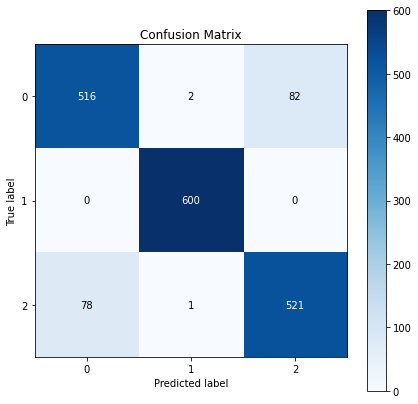

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, LR_pred, figsize=(7,7))

*Cross-validation for Logistic Regression*

In [ ]:
#from sklearn.model_selection import KFold, cross_val_score
#kf = KFold(n_splits=10, shuffle=True, random_state=0)
#cv_results = cross_val_score(LR, X, y, cv=kf, scoring="accuracy", n_jobs=-1)

# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

RFE on Logistic Regression

In [ ]:
#from sklearn.feature_selection import RFE as RFE
#rfe = RFE(LR)
#LR_FS= rfe.fit(X_train, y_train)
#print("Num Features: %d" % LR_FS.n_features_)
#print("Selected Features: %s" % LR_FS.support_)
#print("Feature Ranking: %s" % LR_FS.ranking_)

**Fitting KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 6))
param_grid = dict(n_neighbors=k_range)
KNN = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)
KNN.fit(X_train, y_train)
#KNN = KNeighborsClassifier()
#KNN.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [ ]:
print('Best Parameters : ', KNN.best_params_)

Best Parameters :  {'n_neighbors': 2}


***Test KNN***

In [ ]:
KNN_pred= KNN.predict(X_test)

In [ ]:
AccuracyKNN= accuracy_score(y_test, KNN_pred)
print('Accuracy= ', AccuracyKNN)

Accuracy=  0.945


In [ ]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       600
           1       1.00      1.00      1.00       600
           2       0.97      0.86      0.91       600

    accuracy                           0.94      1800
   macro avg       0.95      0.94      0.94      1800
weighted avg       0.95      0.94      0.94      1800



*Confusion Matrix*

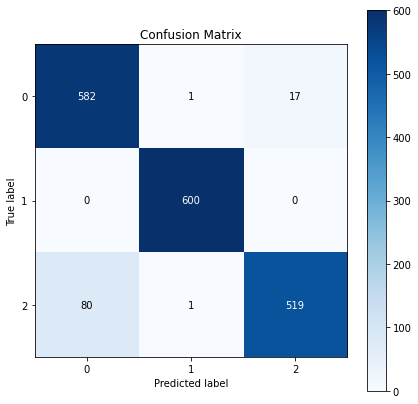

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, KNN_pred, figsize=(7,7))

*Cross-validation for KNN*

In [ ]:
#cv_results = cross_val_score(KNN, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

***Test Naive Bayes***

In [ ]:
NB_pred = NB.predict(X_test)
AccuracyNB= accuracy_score(y_test, NB_pred)
print('Accuracy= ', AccuracyNB)


Accuracy=  0.7961111111111111


In [ ]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.58       600
           1       1.00      1.00      1.00       600
           2       0.63      0.97      0.76       600

    accuracy                           0.80      1800
   macro avg       0.85      0.80      0.78      1800
weighted avg       0.85      0.80      0.78      1800



*Confusion Matrix*

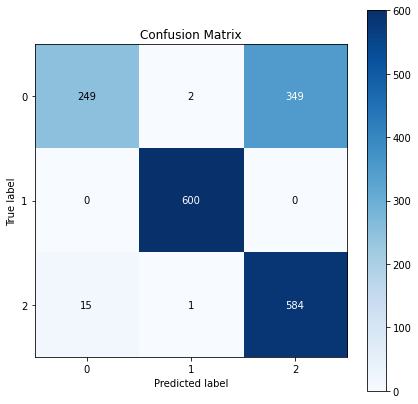

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, NB_pred, figsize=(7,7))

*Cross-validation on Naive Bayes*

In [ ]:
#cv_results = cross_val_score(NB, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting SVM**

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
SVM = GridSearchCV(estimator = SVC(probability= True), param_grid = param_grid, 
                          cv = 10, n_jobs = 1, verbose = 0)
SVM.fit(X_train, y_train)
#SVM = SVC()
#SVM.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print('Best Parameters : ', SVM.best_params_)

Best Parameters :  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


***Test SVM***

In [ ]:
SVM_pred = SVM.predict(X_test)

In [ ]:
AccuracySVM= accuracy_score(y_test, SVM_pred)
print('Accuracy= ', AccuracySVM)

Accuracy=  0.9216666666666666


In [ ]:
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       600
           1       1.00      1.00      1.00       600
           2       0.91      0.85      0.88       600

    accuracy                           0.92      1800
   macro avg       0.92      0.92      0.92      1800
weighted avg       0.92      0.92      0.92      1800



*Confusion Matrix*

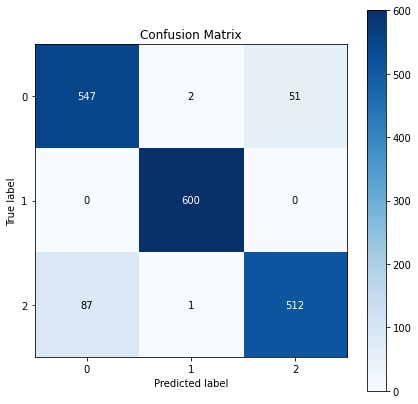

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, SVM_pred, figsize=(7,7))

*Cross validation on SVM*

In [ ]:
#cv_results = cross_val_score(SVM, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15,100]}

In [ ]:
RF = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)
RF.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15,
                                          100]})

In [ ]:
print('Best Parameters : ', RF.best_params_)

Best Parameters :  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 13}


In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#RF = RandomForestClassifier()
#RF.fit(X_train, y_train)

***Test Random Forest***

In [ ]:
RF_pred= RF.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
AccuracyRF= accuracy_score(y_test, RF_pred)
print('Accuracy= ', AccuracyRF)

Accuracy=  0.9494444444444444


In [ ]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       600
           1       1.00      1.00      1.00       600
           2       0.98      0.87      0.92       600

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



*Confussion Matrix*

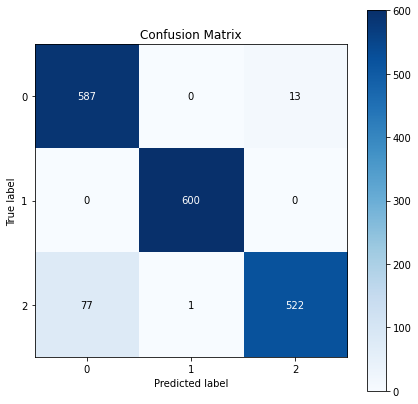

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, RF_pred, figsize=(7,7))

*Cross Validation on RF*

In [ ]:
#cv_results = cross_val_score(RF, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,10,15,50,150]}

In [ ]:
#DT = DecisionTreeClassifier()
#DT.fit(X_train,y_train)

In [ ]:
DT = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)
DT.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 10, 15, 50, 150]})

In [ ]:
print('Best Parameters : ', DT.best_params_)

Best Parameters :  {'criterion': 'gini', 'max_depth': 10}


***Test Decision Tree***

In [ ]:
DT_pred= DT.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
AccuracyDT= accuracy_score(y_test, DT_pred)
print('Accuracy= ', AccuracyDT)

Accuracy=  0.9488888888888889


In [ ]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       600
           1       1.00      1.00      1.00       600
           2       0.97      0.87      0.92       600

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



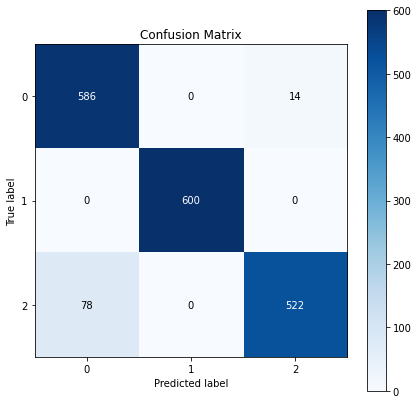

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, DT_pred, figsize=(7,7))

*Cross-validation on Decision Tree*

In [ ]:
#cv_results = cross_val_score(DT, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {  'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 'n_estimators': [5, 10, 15]}
GB = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)
GB.fit(X_train, y_train)
#GB = GradientBoostingClassifier()
#GB.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15]})

In [ ]:
print('Best Parameters : ', GB.best_params_)

Best Parameters :  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 15}


***Test Gradient Boost***

In [ ]:
GB_pred= GB.predict(X_test)

In [ ]:
AccuracyGB= accuracy_score(y_test, GB_pred)
print('Accuracy= ', AccuracyGB)

Accuracy=  0.9472222222222222


In [ ]:
print(classification_report(y_test, GB_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       600
           1       1.00      1.00      1.00       600
           2       0.97      0.87      0.92       600

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



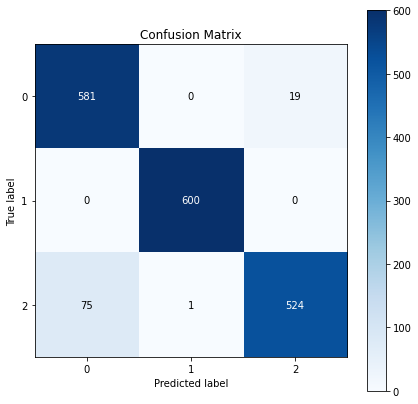

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, GB_pred, figsize=(7,7))

Cross-validation on Gradiant Boost

In [ ]:
#cv_results = cross_val_score(GB, X, y, cv=kf, scoring="accuracy", n_jobs=-1)
# View score for all 10 folds
#cv_results
# Calculate mean
#print('10-fold cross-validation score:', cv_results.mean())

**Fitting ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
ANN = Sequential()
ANN.add(Dense(3, input_shape=(3,)))
ANN.add(Dense(96,activation ="relu"))
ANN.add(Dense(64,activation ="relu"))
ANN.add(Dense(16,activation ="relu"))
ANN.add(Dense(3,activation ="softmax"))
ANN.summary()
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 96)                384       
                                                                 
 dense_2 (Dense)             (None, 64)                6208      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 7,695
Trainable params: 7,695
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = ANN.fit(X_train, y_train, epochs=70,
                           validation_data=(X_test,y_test),
                           batch_size=32,                         
)

Epoch 1/70
225/225 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.7568 - val_loss: 0.3747 - val_accuracy: 0.7867
Epoch 2/70
225/225 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8517 - val_loss: 0.3361 - val_accuracy: 0.8522
Epoch 3/70
225/225 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8489 - val_loss: 0.3356 - val_accuracy: 0.8067
Epoch 4/70
225/225 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8583 - val_loss: 0.3146 - val_accuracy: 0.8772
Epoch 5/70
225/225 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.8642 - val_loss: 0.2998 - val_accuracy: 0.8783
Epoch 6/70
225/225 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8671 - val_loss: 0.2930 - val_accuracy: 0.8522
Epoch 7/70
225/225 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8671 - val_loss: 0.2800 - val_accuracy: 0.8850
Epoch 

In [ ]:
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()


#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()

***Test ANN***

In [ ]:
ANN_pred = ANN.predict(X_test)
ANN_pred=np.argmax(ANN_pred,axis=1)
AccuracyANN= accuracy_score(y_test, ANN_pred)
print('Accuracy= ', AccuracyANN)


Accuracy=  0.9244444444444444


In [ ]:
print(classification_report(y_test, ANN_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       600
           1       1.00      1.00      1.00       600
           2       0.96      0.81      0.88       600

    accuracy                           0.92      1800
   macro avg       0.93      0.92      0.92      1800
weighted avg       0.93      0.92      0.92      1800



*Confusion Matrix*

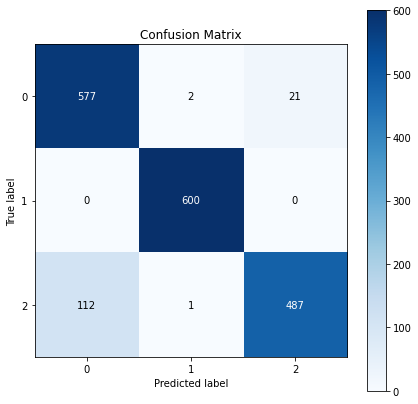

In [ ]:
scikitplot.metrics.plot_confusion_matrix(y_test, ANN_pred, figsize=(7,7))

[Text(42.0, 0.5, 'Predicted Label'),
 Text(0.5, 42.0, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix - ANN ')]

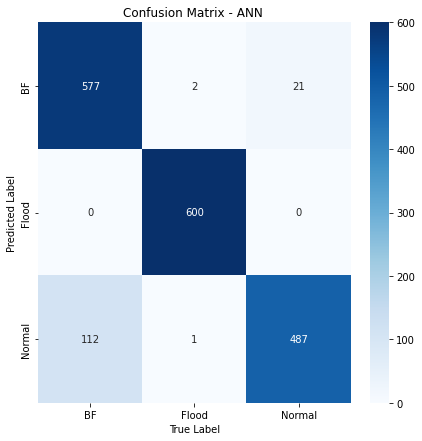